# Ulike metoder for visualisering
### Matplotlib, plotly og widgets

Denne filen viser to ulike metoder for visualisering av datasettet.

1. **Matplotlib** for å lage enkle, statiske grafer. Her er det produsert to grafer som visualiserer all dataen fra 2011 gjennom en linjegraf og et histogram.

2. **Plotly og ipywidgets** for å lage en interaktiv visualisering der brukeren selv kan velge, år, måned, dag og visningstype. Denne metoden gjør det mulig å enkelt sammenligne ulike tidsperioder og MW produksjonen på en mer fleksibel måte. Disse grafene oppdateres dynamisk, og det er også mulig for å lagre de produserte grafene direkte til datamappen. 

Filen demonstrerer også hvordan statiske og interaktive visualiseringer kan brukes for å analysere og lese store datasett.

In [2]:
# Importering av biblioteker
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import plotly.express as px
import os
import datetime

# Definerer dataene fra det komplette datasettet
csv_filsti = os.path.join("..", "data", "komplett_data_med_utfylte_mengder.csv")
df = pd.read_csv(csv_filsti)
df['datetime'] = pd.to_datetime(df['datetime'])

# Variabler og konstanter
måneder_norsk = ['Januar', 'Februar', 'Mars', 'April', 'Mai', 'Juni',
                 'Juli', 'August', 'September', 'Oktober', 'November', 'Desember']
år_liste = list(range(2011, 2022)) 
måned_options = [(navn, i) for i, navn in enumerate(måneder_norsk, start=1)]

### Matplotlib:
Matplotlib kan brukes for å visualisere dataene på ulike måter slik at man enklere kan forstå hva dataene i et datasett beskriver/forteller. 
Det er et bibliotek som enkelt viser mønstre, sesongvariasjon, avvik og andre sammenhenger man muligens ikke hadde sett gjennom tabeller og rene datasett.

Dette biblioteket består av mange forskjellige funksjoner, men brukes for det meste til å visualisere linjegrafer, søylediagram og histogram. Disse funksjonene er nyttige for å visualisere eks. sammenligninger av verdier over tid, tidsserier over produksjon eller forhold mellom to variabler. Ved bruk av Matplotlib får du stor kontroll over hvordan grafene skal se ut, og det er dermed veldig enkelt å tilpasse de etter ønsker og krav.

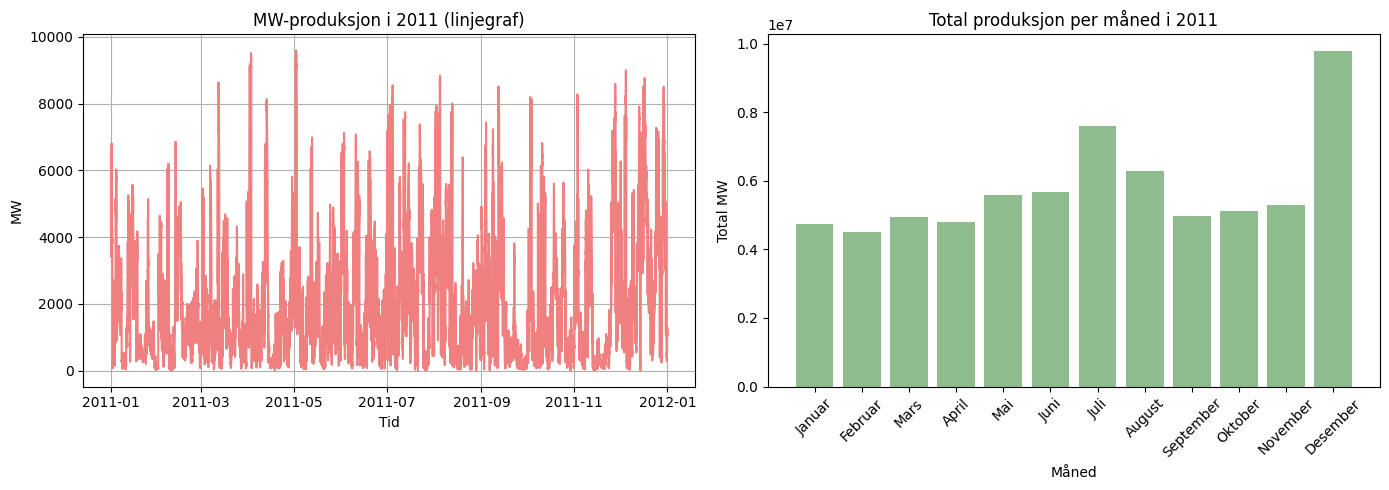

In [3]:
# Definerer all dataen for 2011 fra datasettet 
df_2011 = df[df['datetime'].dt.year == 2011]

plt.figure(figsize=(14,5))

# Linjegraf for hele 2011
plt.subplot(1, 2, 1)
plt.plot(df_2011["datetime"], df_2011["MW"], color='lightcoral')
plt.title("MW-produksjon i 2011 (linjegraf)")
plt.xlabel("Tid")
plt.ylabel("MW")
plt.grid(True)

# Søylediagram med summen hver måned i 2011
produksjon_per_mnd = df_2011.groupby(df_2011["datetime"].dt.month)["MW"].sum()

plt.subplot(1, 2, 2)
plt.bar(produksjon_per_mnd.index, produksjon_per_mnd.values, color='darkseagreen')
plt.title("Total produksjon per måned i 2011")
plt.xlabel("Måned")
plt.ylabel("Total MW")
plt.xticks(ticks=range(1, 13), labels=måneder_norsk[:12], rotation=45)
plt.tight_layout()
plt.show()

### Interaktiv visualisering:

Interaktive visualiseringer gir brukeren mulighet tilå selv utforske datasett ved å filtrere, sammenligne, forstørre/forminske, eller velge parametre direkte i visningen. Med dette får brukeren en mer fleksibel og brukervennlig analyseopplevelse. 

I denne interaktive visualiseringen er det brukt disse stegene som fremgangsmåte:

1. Databehandling:
    
    Først har vi i tidligere oppgaver behandlet/renset datasettet df_germany og laget det komplette datasettet df som vi bruker i denne visualiseringen. Vi bruker det komplette datasettet i denne visualiseringen for å produsere en best mulig analyse av datasettet. 

2. Laste ned biblioteker og pakker:

    For å kunne bruke ipywidgets, plotly og andre biblioteker til den interaktive visualiseringen må de først importeres og/eller installeres. 

3. Opprette widgets:

    ipywidgets har gitt oss muligheten for å lage dropdown-menyer og knapper. Disse har vi brukt mye med valg av visualiseringstype, datovalg, visningstype, og knapper med ulike funksjoner.

4. Knytte widgets til funksjonen:

    Opprette en funksjon som tar inn verdiene fra widgetsene (eks. dato) og bruker disse til å hente og visualisere riktig del av datasettet.

5. Visualisere med Plotly:

    Plotly lager grafene og de blir automatisk oppdatert utifra hvilket valg brukeren velger i dropdown-menyene. 

6. Visning og layout:

    Bruker VBox og HBox for å visualisere grafen, widgetsene og infoboksen sammen. 

Denne fremgangsmåten har gitt oss en fin og god interaktiv visualisering.

I motsetning til en statisk visualisering gir denne metoden en større grad av brukertilpasning, utforskbarhet og reduserer behovet for mange grafer. Brukeren kan selv gjennom denne visualiseringen selv velge hvilke data som skal vises og på hvilken måte. Det blir derfor enklere for brukeren og utforske datasette, oppdage trender, sesongvariasjon og andre interessanne aspekter dataene sjuler. Når brukeren selv kan velge data slipper man å produsere mange separate grafer for hver del av datasettet. Disse faktorene er noen av mange som beskriver fordelene med interaktive visualiseringer. 

In [4]:
# Globale widgets og variabler
dropdown_widgets = []
widgets_periode = []
output_boks = widgets.Output()
siste_fig = None
info_boks = widgets.HTML(layout=widgets.Layout(width='320px', padding='10px 20px'))
output_boks.layout = widgets.Layout(padding='30px')

# Overskrift 
overskrift = widgets.HTML(value="<h1 style='color:#333; text-align:center;'>Interaktiv visualisering av MW-produksjon fra en vindmølle i Tyskland</h1>")

# dropdown-meny med valg av visualiseringstype
valg_visualisering = widgets.Dropdown(
    options=["Sammenligning av tidsperioder", "Vis én tidsperiode"],
    value="Sammenligning av tidsperioder",
    description="Velg visualisering:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='420px')
)

# Knapper
knapp_neste = widgets.Button(description="Gå videre", button_style='success', layout=widgets.Layout(width='250px'))
knapp_bygg = widgets.Button(description="Bygg ny visualisering", button_style='success', layout=widgets.Layout(width='250px'))
knapp_start = widgets.Button(description="Start", button_style='info', layout=widgets.Layout(width='250px'))
knapp_reset = widgets.Button(description="Tilbake til start", button_style='warning', layout=widgets.Layout(width='200px'))
knapp_lagre = widgets.Button(description="Lagre graf", button_style='primary', layout=widgets.Layout(width='200px'))


# Valg for antall perioder man ønsker å visualisere
velg_antall = widgets.Dropdown(
    options=list(range(1, 11)),
    value=2,
    description="Velg antall tidsperioder du ønsker å visualisere:",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='450px')
)

# Valg for hvilken visningstype man ønsker
visningstype = widgets.Dropdown(
    options=["Linjegraf", "Søylediagram", "Boksplott"],
    value="Linjegraf",
    description="Visningstype",
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='250px')
)

# Funksjon for å hente data basert på valgt år, måned og dag
def hent_data(aar, mnd, dag):
    data = df[(df["datetime"].dt.year == aar) & (df["datetime"].dt.month == mnd)].copy()
    if dag > 0:
        data = data[data["datetime"].dt.day == dag]
    label = f"{måneder_norsk[mnd-1]} {aar}" if dag == 0 else f"{måneder_norsk[mnd-1]} {aar} - dag {dag}"
    data["visningstid"] = data["datetime"].apply(lambda x: x.replace(year=2025, month=1, day=1) if dag > 0 else x.replace(year=2025, month=1))
    data["label"] = label
    return data

# Funksjon som lager grafen basert på hvilken visningstype man har valgt
def vis_graf(*args, visningstype):
    data_liste = [hent_data(*args[i:i+3]) for i in range(0, len(args), 3)]
    samlet = pd.concat(data_liste)
    dag_verdier = args[2::3]
    er_dagvisning = any(d > 0 for d in dag_verdier)
    x_label = "Tid på døgnet" if er_dagvisning else "Dag i måneden"

    # Velger riktig plott basert på visningstype
    if visningstype == "Linjegraf":
        fig = px.line(
            samlet, x="visningstid", y="MW", color="label",
            title="Visualisering av ønskede tidsperiode(r)",
            labels={"visningstid": x_label, "MW": "Megawatt (MW)", "label": "Valgte perioder"}
        )
    elif visningstype == "Søylediagram":
        summering = pd.DataFrame({
            "label": [d["label"].iloc[0] for d in data_liste],"MW": [d["MW"].sum() for d in data_liste]})
    
        fig = px.bar(summering, x="label", y="MW", color="label",
                     title="Søylediagram - total produksjon per valgt periode",
                     labels={"label": "Valgte perioder", "MW": "Megawatt (MW)"}
                     )
        fig.update_traces(opacity=0.9, width=0.5)

    elif visningstype == "Boksplott":
        fig = px.box(
            samlet, x="label", y="MW", color="label",
            title="Boksplott for ønskede tidsperiode(r)",
            labels={"label": "Valgte perioder", "MW": "Megawatt (MW)"}
        )

    fig.update_layout(hovermode="x unified")
    if visningstype != "Boksplott":
        fig.update_xaxes(tickformat="%H:%M" if er_dagvisning else "%d")

    # Infoboks
    totaler = [int(d["MW"].sum()) for d in data_liste]
    if len(data_liste) == 1:
        info_boks.value = f"""
            <div style='border:1px solid #ccc; border-radius:8px; background-color:#f9f9f9; padding:10px 15px;'>
              <h4>Totalt produsert MW:</h4>
              <ul>
                <li><b>{data_liste[0]['label'].iloc[0]}</b>: {totaler[0]:,} MW</li>
              </ul>
            </div>
        """
    else:
        forskjell = totaler[-1] - totaler[0]
        tegn = "+" if forskjell >= 0 else ""
        info_boks.value = f"""
            <div style='border:1px solid #ccc; border-radius:8px; background-color:#f9f9f9; padding:10px 15px;'>
              <h4>Totalt produsert MW i periodene:</h4>
              <ul>
                <li><b>{data_liste[0]['label'].iloc[0]}</b>: {totaler[0]:,} MW</li>
                <li><b>{data_liste[-1]['label'].iloc[0]}</b>: {totaler[-1]:,} MW</li>
                <li><b>Forskjellen fra periode 1 til {len(data_liste)}:</b> {tegn}{forskjell:,} MW</li>
              </ul>
            </div>
        """
    return fig

# Flere tidsperioder
def lag_valg_interface(antall):
    dropdown_widgets.clear()
    widgets_periode.clear()
    for i in range(antall):
        år = widgets.Dropdown(options=år_liste, value=2011, description=f"År {i+1}")
        mnd = widgets.Dropdown(options=måned_options, value=1, description=f"Måned {i+1}")
        dag = widgets.Dropdown(options=[(f"Dag {i}", i) for i in range(0, 32)], value=0, description=f"Dag {i+1}")
        dropdown_widgets.extend([år, mnd, dag])
        widgets_periode.append(widgets.VBox([år, mnd, dag]))

    rad_1 = widgets.HBox(widgets_periode)
    all_controls = widgets.VBox([rad_1, visningstype, knapp_start])

    with output_boks:
        clear_output()
        display(widgets.VBox([overskrift, all_controls]))

    info_boks.value = ""

# En tidsperiode
def bygg_en_periode_interface():
    dropdown_widgets.clear()
    år = widgets.Dropdown(options=år_liste, value=2011, description="År")
    mnd = widgets.Dropdown(options=måned_options, value=1, description="Måned")
    dag = widgets.Dropdown(options=[(f"Dag {i}", i) for i in range(0, 32)], value=0, description="Dag")
    dropdown_widgets.extend([år, mnd, dag])
    all_controls = widgets.VBox([
        widgets.HBox([år, mnd, dag]),
        visningstype,
        knapp_start
    ])

    with output_boks:
        clear_output(wait=True)
        display(widgets.VBox([overskrift, all_controls]))

    info_boks.value = ""

# Reset knapp
def tilbake_til_start(b):
    info_boks.value = ""

    with output_boks:
        clear_output(wait=True)
        display(widgets.VBox([overskrift, valg_visualisering, knapp_neste]))

# Lagre graf knapp
def lagre_graf(b):
    global siste_fig
    tidspunkt = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    filnavn = f"graf_{visningstype.value.lower()}_{tidspunkt}.png"
    prosjektrot = os.path.abspath("..")
    lagre_sti = os.path.join(prosjektrot, "data", "lagrede_grafer", filnavn)

    try:
        if siste_fig:
            os.makedirs(os.path.dirname(lagre_sti), exist_ok=True)
            siste_fig.write_image(lagre_sti)
            info_boks.value += f"<p style='color:green;'>Grafen ble lagret som <code>{filnavn}</code></p>"
        else:
            info_boks.value += "<p style='color:red;'>Ingen graf å lagre.</p>"
    except Exception as e:
        info_boks.value += f"<p style='color:red;'>Kunne ikke lagre grafen: {e}</p>"


# Starter visualiseringen
def start_visning(b):
    global siste_fig
    args = [w.value for w in dropdown_widgets]
    fig = vis_graf(*args, visningstype=visningstype.value)
    siste_fig = fig
    with output_boks:
        clear_output(wait=True)
        display(overskrift)
        display(fig) 
        display(info_boks)
        display(widgets.HBox([knapp_reset, knapp_lagre], layout=widgets.Layout(gap="20px")))

# Funksjon for å håndtere valg av visualiseringstype
def velg_visualisering(b):
    with output_boks:
        clear_output(wait=True)
        display(overskrift)
        if valg_visualisering.value == "Sammenligning av tidsperioder":
            display(widgets.VBox([velg_antall, knapp_bygg]))
        elif valg_visualisering.value == "Vis én tidsperiode":
            bygg_en_periode_interface()

# Kobler knappene til funksjonene slik at de fungerer
knapp_bygg.on_click(lambda b: lag_valg_interface(velg_antall.value))
knapp_start.on_click(start_visning)
knapp_neste.on_click(velg_visualisering)
knapp_reset.on_click(tilbake_til_start)
knapp_lagre.on_click(lagre_graf)

# Viser startsiden med overskrift og valg av visualiseringstype
with output_boks:
    clear_output(wait=True)
    display(widgets.VBox([overskrift, valg_visualisering, knapp_neste]))

display(output_boks)



Output(layout=Layout(padding='30px'))

### Evaluering:

Ut i fra de to metodene vi har brukt ser vi tydelig at den interaktive visualiseringen er den som best visualiserer datasettet og hva det forteller oss. Gjennom de ulike visualiseringstypene ser vi tydelig at det er stor variasjon i mengden MW produsert på ulike tidspunkter, dette kommer godt frem gjennom "Sammenligning av tidspunkter" funksjonen i visualiseringen. 

De produserte grafene er enkle å lese/forstå, med tydelige navn og farger på aksetitler og grafer. Ved valg av visualiseringstype blir det lettere for brukeren å finne frem til den informasjonen de ønsker. 

Visualiseringen gir dermed brukeren et bredt spekter av valg til å selv utforske dataene, som oppnår det vi ønsket for visualiseringen. 